In [1]:
#!/usr/bin/python3
# coding: utf-8
# prefectures

In [2]:
import codecs
from datetime import datetime as dt
from datetime import timedelta as td
import matplotlib
import sys
if "ipy" not in sys.argv[0]:
    matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import os
import pandas as pd
from PIL import Image
from cov19utils import create_basic_plot_figure, \
    show_and_clear, moving_average, \
    blank2zero, csv2array, \
    get_twitter, tweet_with_image, \
    get_gpr_predict, FONT_NAME, DT_OFFSET, \
    download_if_needed, json2nparr, code2int, age2int, \
    get_populations, get_os_idx_of_arr, dump_val_in_arr, \
    calc_last1w2w_dif, create_basic_scatter_figure, \
    mak_japan_heatmap

In [3]:
populations = get_populations()
#print(populations)

All population in Japan: 127094745


In [4]:
# 全国情報
ogiwara_uri = "https://raw.githubusercontent.com/kaz-ogiwara/covid19/master/data/"
pref_file = "prefectures.csv"
download_if_needed(ogiwara_uri, pref_file)

In [5]:
offsets = dict(
    year  = 0, # 年
    month = 1, # 月
    day   = 2, # 日
    st_ja = 3, # 都道府県
    st_en = 4, # state
    posis = 5, # 陽性者数
    tests = 6, # 検査数
    hospi = 7, # hospitalized
    serio = 8, # serious
    disch = 9, # discharged
    death =10, # deaths
    ern   =11, # Effective Reproduction Number
)

In [6]:
dt_start = dt.strptime("2020/2/8", "%Y/%m/%d") # 統計開始日
dt_now   = dt.now() # 現在日時
dt_delta = (dt_now - dt_start).days # 差分
n_states = 47 # 都道府県数
erns = [] # 実効再生産数
poss = [] # 陽性者数
test = [] # 検査数
for i in np.arange(dt_delta):
    erns.append(np.zeros(n_states+1).tolist())
    poss.append(np.zeros(n_states+1).tolist())
    test.append(np.zeros(n_states+1).tolist())
    test[i][0] = poss[i][0] = erns[i][0] = i

In [7]:
with codecs.open("prefectures.csv", encoding='utf-8') as f:
    l = f.readline()
    cnt = 0
    while l:
        l = f.readline().replace("\r\n", "").rstrip()
        elems = l.split(',')
        if len(elems) < 2:
            continue
        dt_idx  = (dt(int(elems[0]), int(elems[1]), int(elems[2])) - dt_start).days
        st_name = elems[offsets['st_en']]
        st_idx  = populations[st_name]['code']
        erns[dt_idx][st_idx] = blank2zero(elems[offsets['ern']])
        poss[dt_idx][st_idx] = blank2zero(elems[offsets['posis']])
        tested = blank2zero(elems[offsets['tests']])
        if tested > 0:
            test[dt_idx][st_idx] = tested
        cnt += 1
print("Load {} lines.".format(cnt))

Load 10054 lines.


In [8]:
erns = np.array(erns)
poss = np.array(poss)
test = np.array(test)

In [9]:
os_idx = get_os_idx_of_arr(erns, dt_delta)
latest_erns = erns[os_idx] # 最新の実効再生産数
dump_val_in_arr(populations, latest_erns, "最新の実効再生産数")

Data offset index: -2
最新の実効再生産数: 北海道=1.3 青森=1.0 岩手=0.0 宮城=1.4 秋田=0.0 山形=0.0 福島=1.4 茨城=1.3 栃木=0.6 群馬=1.6 埼玉=1.2 千葉=1.1 東京=0.9 神奈川=0.8 新潟=2.2 山梨=0.7 長野=1.0 岐阜=0.3 静岡=0.7 愛知=0.6 三重=1.0 富山=0.5 石川=0.2 福井=0.0 滋賀=0.5 京都=0.8 大阪=0.9 兵庫=1.1 奈良=0.9 和歌山=0.4 鳥取=0.0 島根=0.0 岡山=0.7 広島=0.6 山口=1.0 徳島=1.0 香川=0.0 愛媛=0.0 高知=0.0 福岡=0.9 佐賀=2.2 長崎=0.0 熊本=5.4 大分=0.0 宮崎=0.0 鹿児島=0.8 沖縄=1.2 


In [10]:
os_idx = get_os_idx_of_arr(poss, dt_delta)
latest_poss = poss[os_idx] # 最新の感染者数
dump_val_in_arr(populations, latest_poss, "最新の感染者数", 0)

Data offset index: -2
最新の感染者数: 北海道=2267 青森=37 岩手=24 宮城=453 秋田=58 山形=79 福島=287 茨城=698 栃木=443 群馬=741 埼玉=4923 千葉=4193 東京=27117 神奈川=7331 新潟=176 山梨=196 長野=317 岐阜=631 静岡=565 愛知=5478 三重=535 富山=422 石川=778 福井=248 滋賀=510 京都=1800 大阪=10999 兵庫=2838 奈良=587 和歌山=243 鳥取=36 島根=140 岡山=162 広島=615 山口=207 徳島=149 香川=93 愛媛=115 高知=138 福岡=5069 佐賀=248 長崎=238 熊本=642 大分=158 宮崎=344 鹿児島=447 沖縄=2682 


In [11]:
diff1w_poss, diff2w_poss = calc_last1w2w_dif(poss, dt_delta)
dump_val_in_arr(populations, diff1w_poss, "1週間陽性者数", 0)
dump_val_in_arr(populations, diff2w_poss, "2週間陽性者数", 0)

Data offset index: -2
1週間陽性者数: 北海道=160 青森=1 岩手=1 宮城=47 秋田=5 山形=1 福島=34 茨城=39 栃木=11 群馬=35 埼玉=238 千葉=259 東京=1144 神奈川=356 新潟=6 山梨=6 長野=7 岐阜=4 静岡=17 愛知=115 三重=26 富山=3 石川=1 福井=4 滋賀=7 京都=38 大阪=330 兵庫=121 奈良=13 和歌山=1 鳥取=0 島根=0 岡山=5 広島=38 山口=6 徳島=1 香川=0 愛媛=1 高知=0 福岡=29 佐賀=3 長崎=2 熊本=64 大分=0 宮崎=0 鹿児島=25 沖縄=166 
2週間陽性者数: 北海道=271 青森=2 岩手=1 宮城=78 秋田=5 山形=1 福島=55 茨城=67 栃木=32 群馬=53 埼玉=429 千葉=478 東京=2471 神奈川=822 新潟=8 山梨=16 長野=14 岐阜=25 静岡=43 愛知=333 三重=52 富山=12 石川=15 福井=4 滋賀=27 京都=95 大阪=728 兵庫=222 奈良=29 和歌山=5 鳥取=0 島根=2 岡山=13 広島=123 山口=12 徳島=2 香川=0 愛媛=1 高知=1 福岡=62 佐賀=4 長崎=2 熊本=70 大分=0 宮崎=0 鹿児島=58 沖縄=300 


In [12]:
# 都道府県別 罹患率
incid1w_rate = np.zeros(n_states + 1).tolist() # 罹患率 (1週足)
incid2w_rate = np.zeros(n_states + 1).tolist() # 罹患率 (2週足)
incid_all_rate = np.zeros(n_states + 1).tolist() # 罹患率 (全期間)
for k, v in populations.items():
    i = v['code']
    incid1w_rate[i] = (diff1w_poss[i] / v['total']) * 100 # percentage
    incid2w_rate[i] = (diff2w_poss[i] / v['total']) * 100 # percentage
    incid_all_rate[i] = (latest_poss[i] / v['total']) * 100 # percentage
dump_val_in_arr(populations, incid_all_rate, "全期間罹患率", 3)

全期間罹患率: 北海道=0.042 青森=0.003 岩手=0.002 宮城=0.019 秋田=0.006 山形=0.007 福島=0.015 茨城=0.024 栃木=0.022 群馬=0.038 埼玉=0.068 千葉=0.067 東京=0.201 神奈川=0.080 新潟=0.008 山梨=0.023 長野=0.015 岐阜=0.031 静岡=0.015 愛知=0.073 三重=0.029 富山=0.040 石川=0.067 福井=0.032 滋賀=0.036 京都=0.069 大阪=0.124 兵庫=0.051 奈良=0.043 和歌山=0.025 鳥取=0.006 島根=0.020 岡山=0.008 広島=0.022 山口=0.015 徳島=0.020 香川=0.010 愛媛=0.008 高知=0.019 福岡=0.099 佐賀=0.030 長崎=0.017 熊本=0.036 大分=0.014 宮崎=0.031 鹿児島=0.027 沖縄=0.187 


In [13]:
diff1w_test, diff2w_test = calc_last1w2w_dif(test, dt_delta)
dump_val_in_arr(populations, diff1w_test, "1週間陽検査数", 0)
dump_val_in_arr(populations, diff2w_test, "2週間陽検査数", 0)

Data offset index: -2
1週間陽検査数: 北海道=4278 青森=136 岩手=253 宮城=735 秋田=160 山形=84 福島=1472 茨城=268 栃木=2399 群馬=1644 埼玉=6756 千葉=14099 東京=24173 神奈川=9883 新潟=550 山梨=224 長野=861 岐阜=941 静岡=2388 愛知=5428 三重=1164 富山=865 石川=962 福井=210 滋賀=656 京都=2317 大阪=10823 兵庫=2819 奈良=1087 和歌山=240 鳥取=29 島根=104 岡山=544 広島=777 山口=447 徳島=133 香川=581 愛媛=80 高知=38 福岡=8079 佐賀=168 長崎=1012 熊本=573 大分=823 宮崎=61 鹿児島=971 沖縄=3291 
2週間陽検査数: 北海道=7601 青森=256 岩手=544 宮城=1258 秋田=222 山形=174 福島=3121 茨城=618 栃木=4156 群馬=4516 埼玉=15972 千葉=26021 東京=56557 神奈川=20791 新潟=1227 山梨=494 長野=1601 岐阜=2152 静岡=4753 愛知=11035 三重=1741 富山=1510 石川=1922 福井=444 滋賀=1284 京都=4764 大阪=22675 兵庫=5864 奈良=2110 和歌山=427 鳥取=124 島根=562 岡山=793 広島=1737 山口=1048 徳島=248 香川=1071 愛媛=146 高知=118 福岡=94266 佐賀=497 長崎=1880 熊本=958 大分=1861 宮崎=140 鹿児島=1983 沖縄=5509 


In [14]:
# 都道府県別 陽性率
test1w_rate = np.zeros(n_states + 1).tolist() # 陽性率 (1週足)
test2w_rate = np.zeros(n_states + 1).tolist() # 陽性率 (2週足)
for k, v in populations.items():
    i = v['code']
    if diff1w_test[i] > 0:
        test1w_rate[i] = (diff1w_poss[i] / diff1w_test[i]) * 100 # percentage
    if diff2w_test[i] > 0:
        test2w_rate[i] = (diff2w_poss[i] / diff2w_test[i]) * 100 # percentage
dump_val_in_arr(populations, test1w_rate, "1週間陽性率", 1)
dump_val_in_arr(populations, test2w_rate, "2週間陽性率", 1)

1週間陽性率: 北海道=3.7 青森=0.7 岩手=0.4 宮城=6.4 秋田=3.1 山形=1.2 福島=2.3 茨城=14.6 栃木=0.5 群馬=2.1 埼玉=3.5 千葉=1.8 東京=4.7 神奈川=3.6 新潟=1.1 山梨=2.7 長野=0.8 岐阜=0.4 静岡=0.7 愛知=2.1 三重=2.2 富山=0.3 石川=0.1 福井=1.9 滋賀=1.1 京都=1.6 大阪=3.0 兵庫=4.3 奈良=1.2 和歌山=0.4 鳥取=0.0 島根=0.0 岡山=0.9 広島=4.9 山口=1.3 徳島=0.8 香川=0.0 愛媛=1.2 高知=0.0 福岡=0.4 佐賀=1.8 長崎=0.2 熊本=11.2 大分=0.0 宮崎=0.0 鹿児島=2.6 沖縄=5.0 
2週間陽性率: 北海道=3.6 青森=0.8 岩手=0.2 宮城=6.2 秋田=2.3 山形=0.6 福島=1.8 茨城=10.8 栃木=0.8 群馬=1.2 埼玉=2.7 千葉=1.8 東京=4.4 神奈川=4.0 新潟=0.7 山梨=3.2 長野=0.9 岐阜=1.2 静岡=0.9 愛知=3.0 三重=3.0 富山=0.8 石川=0.8 福井=0.9 滋賀=2.1 京都=2.0 大阪=3.2 兵庫=3.8 奈良=1.4 和歌山=1.2 鳥取=0.0 島根=0.4 岡山=1.6 広島=7.1 山口=1.1 徳島=0.8 香川=0.0 愛媛=0.7 高知=0.8 福岡=0.1 佐賀=0.8 長崎=0.1 熊本=7.3 大分=0.0 宮崎=0.0 鹿児島=2.9 沖縄=5.4 


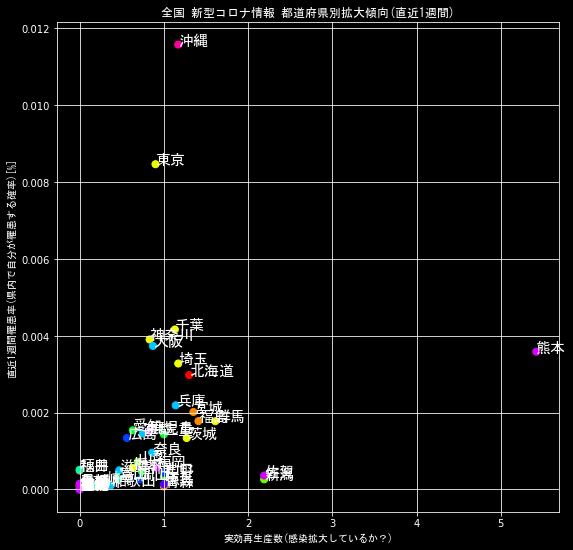

In [15]:
fig, ax = create_basic_scatter_figure("実効再生産数(感染拡大しているか？)", "直近1週間罹患率(県内で自分が罹患する確率)[%]")
cols = [ "#ff0000" for i in range(n_states)]
texts = [ "?" for i in range(n_states)]
for k, v in populations.items():
    cols[v['code'] - 1]  = cm.hsv(v['region'] / 11)
    texts[v['code'] - 1] = v['ja']
plt.scatter(latest_erns[1:], incid1w_rate[1:], s=50, c=cols)
for i in range(n_states):
    ax.annotate(texts[i], xy=(latest_erns[1 + i], incid1w_rate[1 + i]), size=15, fontname=FONT_NAME)
tw_body_1w = '全国 新型コロナ情報 都道府県別拡大傾向(直近1週間)'
plt.title(tw_body_1w, fontname=FONT_NAME)

show_and_clear(fig, "images/ern-1w_poss.jpg")

In [16]:
def show_zoomed_ern_scatter(
    xbins, ybins, colors, xytexts, nweek, filename, title, xlabel, ylabel,
    n_neighbors=30, n_states=47):
    fig, ax = create_basic_scatter_figure(xlabel, ylabel)
    # LOF
    clf = LocalOutlierFactor(
        n_neighbors=n_neighbors, contamination='auto',
        algorithm='auto', metric='mahalanobis')
    X = np.stack([xbins[1:], ybins[1:]], 1)
    y_pred = clf.fit_predict(X)
    selected_cols = np.array(colors)[y_pred == 1]
    selected_text = np.array(xytexts)[y_pred == 1]
    # append top element
    y_pred = np.append(-1, y_pred)
    selected_xbins = xbins[y_pred == 1]
    selected_ybins = np.array(ybins)[y_pred == 1]
    plt.xlim(0, np.max(selected_xbins))
    plt.ylim(0, np.max(selected_ybins))
    plt.scatter(selected_xbins, selected_ybins, s=50, c=selected_cols)
    for i in np.arange(len(selected_xbins)):
        ax.annotate(selected_text[i], xy=(selected_xbins[i], selected_ybins[i]), size=15, fontname=FONT_NAME)
    plt.title(title, fontname=FONT_NAME)
    show_and_clear(fig, filename)

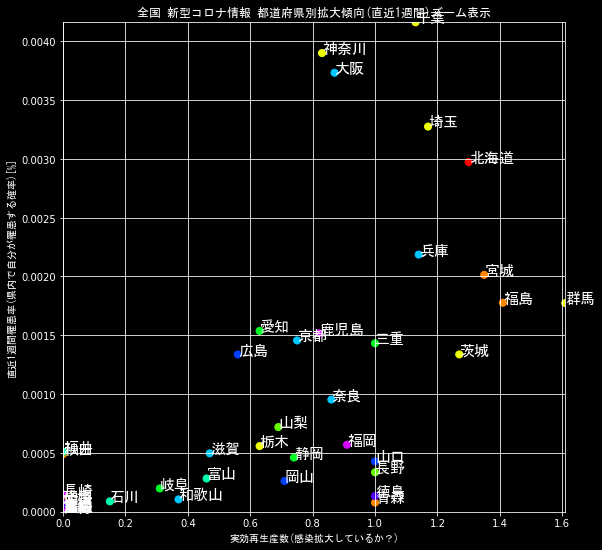

In [17]:
tw_body_1w_zoom = '全国 新型コロナ情報 都道府県別拡大傾向(直近1週間)ズーム表示'
show_zoomed_ern_scatter(
    latest_erns, incid1w_rate, cols, texts, 1, "images/ern-1w_poss-zoom.jpg",
    tw_body_1w_zoom,
    "実効再生産数(感染拡大しているか？)",
    "直近1週間罹患率(県内で自分が罹患する確率)[%]")

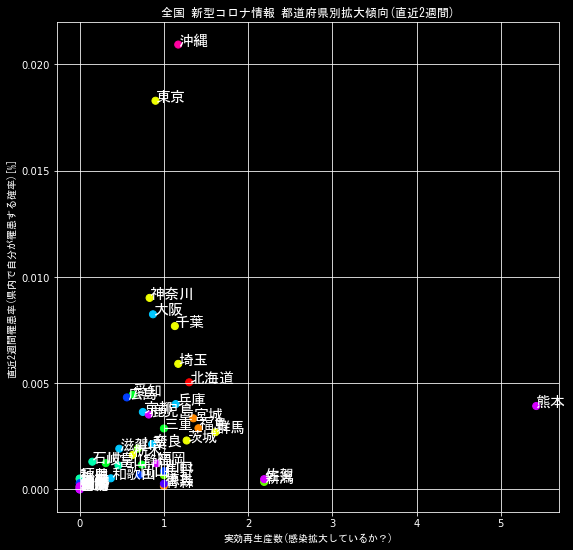

In [18]:
fig, ax = create_basic_scatter_figure("実効再生産数(感染拡大しているか？)", "直近2週間罹患率(県内で自分が罹患する確率)[%]")
plt.scatter(latest_erns[1:], incid2w_rate[1:], s=50, c=cols)
tw_body_2w = '全国 新型コロナ情報 都道府県別拡大傾向(直近2週間)'
plt.title(tw_body_2w, fontname=FONT_NAME)
for i in range(n_states):
    ax.annotate(texts[i], xy=(latest_erns[1 + i], incid2w_rate[1 + i]), size=15, fontname=FONT_NAME)
show_and_clear(fig, "images/ern-2w_poss.jpg")

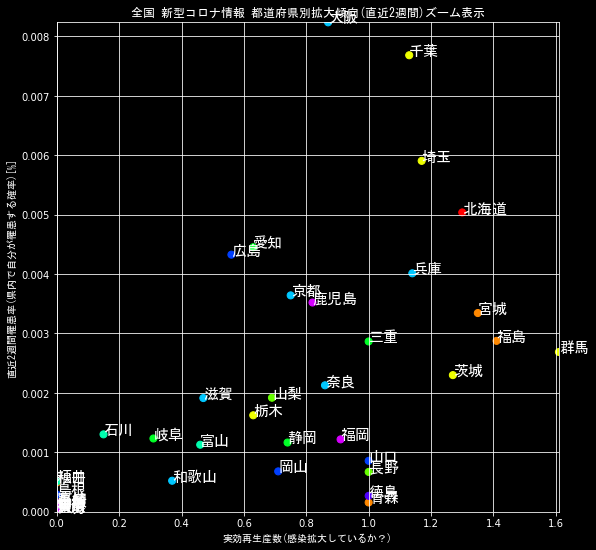

In [19]:
tw_body_2w_zoom = '全国 新型コロナ情報 都道府県別拡大傾向(直近2週間)ズーム表示'
show_zoomed_ern_scatter(
    latest_erns, incid2w_rate, cols, texts, 2, "images/ern-2w_poss-zoom.jpg",
    tw_body_2w_zoom,
    "実効再生産数(感染拡大しているか？)",
    "直近2週間罹患率(県内で自分が罹患する確率)[%]")

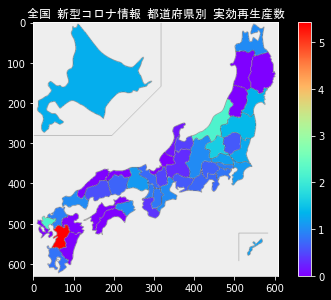

In [20]:
tw_body_map_erns = "全国 新型コロナ情報 都道府県別 実効再生産数"
mak_japan_heatmap('images/japan-erns.jpg', tw_body_map_erns, latest_erns, populations)

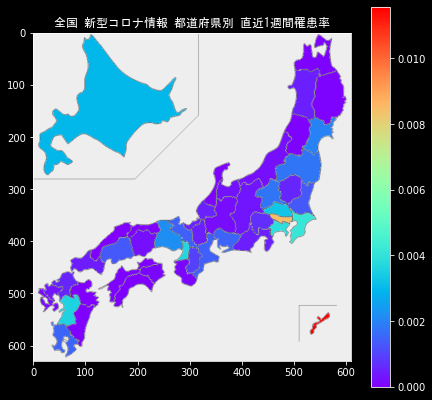

In [21]:
tw_body_map_1w = "全国 新型コロナ情報 都道府県別 直近1週間罹患率"
mak_japan_heatmap('images/japan-1w.jpg', tw_body_map_1w, incid1w_rate, populations)

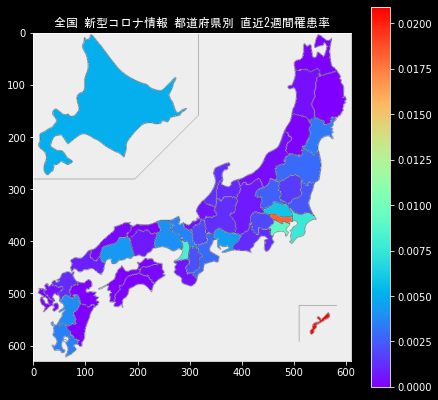

In [22]:
tw_body_map_2w = "全国 新型コロナ情報 都道府県別 直近2週間罹患率"
mak_japan_heatmap('images/japan-2w.jpg', tw_body_map_2w, incid2w_rate, populations)

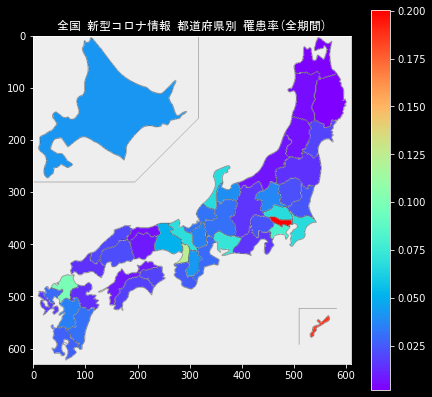

In [23]:
tw_body_map_all = "全国 新型コロナ情報 都道府県別 罹患率(全期間)"
mak_japan_heatmap('images/japan-all.jpg', tw_body_map_all, incid_all_rate, populations)

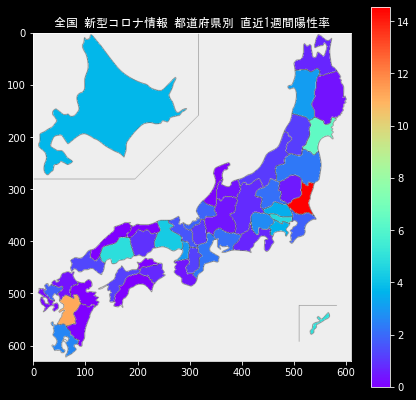

In [24]:
tw_body_map_rate1w = "全国 新型コロナ情報 都道府県別 直近1週間陽性率"
mak_japan_heatmap('images/japan-rate1w.jpg', tw_body_map_rate1w, test1w_rate, populations)

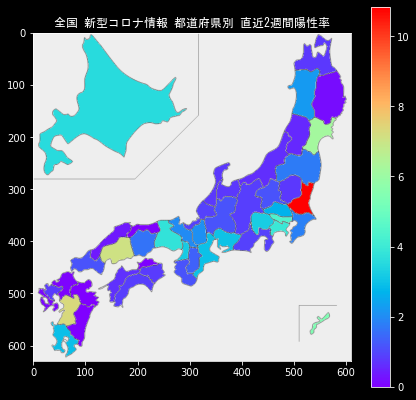

In [25]:
tw_body_map_rate2w = "全国 新型コロナ情報 都道府県別 直近2週間陽性率"
mak_japan_heatmap('images/japan-rate2w.jpg', tw_body_map_rate2w, test2w_rate, populations)

In [26]:
tw = get_twitter()
today_str = dt.now().isoformat()[:19].replace('T', ' ')
tw_body_postfix = " (東洋経済 " + today_str + " 現在)"
#tweet_with_image(tw, "images/ern-1w_poss.jpg", tw_body_1w + tw_body_postfix)
#tweet_with_image(tw, "images/ern-1w_poss-zoom.jpg", tw_body_1w_zoom + tw_body_postfix)
tweet_with_image(tw, "images/ern-2w_poss.jpg", tw_body_2w + tw_body_postfix)
tweet_with_image(tw, "images/ern-2w_poss-zoom.jpg", tw_body_2w_zoom + tw_body_postfix)

In [27]:
tweet_with_image(tw, 'images/japan-erns.jpg', tw_body_map_erns + tw_body_postfix)
#tweet_with_image(tw, 'images/japan-1w.jpg', tw_body_map_1w + tw_body_postfix)
tweet_with_image(tw, 'images/japan-2w.jpg', tw_body_map_2w + tw_body_postfix)
tweet_with_image(tw, 'images/japan-all.jpg', tw_body_map_all + tw_body_postfix)

In [28]:
tweet_with_image(tw, 'images/japan-rate1w.jpg', tw_body_map_rate1w + tw_body_postfix)
tweet_with_image(tw, 'images/japan-rate2w.jpg', tw_body_map_rate2w + tw_body_postfix)